# Esercitazione 2: integrali Monte Carlo e cammini casuali

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/2f/Monaco_Monte_Carlo_1.jpg/1200px-Monaco_Monte_Carlo_1.jpg"  alt="Image" width="300" height="200">

Nella prima parte di questa esercitazione calcoliamo l'integrale 
\begin{eqnarray}\frac{\pi}{2}\int_0^1 \cos(\pi x/2) dx = 1\end{eqnarray}

con il metodo di Monte Carlo. Inizialmente estraggo numeri casuali con una distribuzione uniforme, e valuto il risultato mediando su $10^5$ campionamenti suddivisi in $100$ blocchi.

La varianza associata a una distribuzione uniforme è
\begin{eqnarray}
\sigma^2&=&\frac{\pi^2}{4}\int_0^1\cos^2(\pi x/2)-
\left(\frac{\pi}{2}\int_0^1\cos(\pi x/2)dx\right)^2\\
&=&\frac{\pi^2}{8}-1\\
&=&0.234
\end{eqnarray}

In [28]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import math

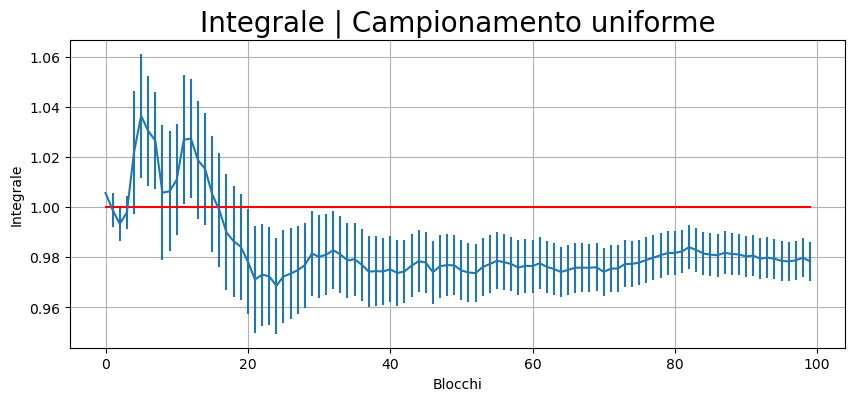

l'errore stimato sulla misura è \sigma=0.0079
lo scostamento dal risultato è 0.0216


In [58]:
sum_prog, err_prog = np.loadtxt("risultati/campionamentoUniforme.txt", unpack=True)

N=sum_prog.shape[0]
x=np.arange(N)

pi_array = np.full(N, 1)

plt.figure(figsize=(10,4))
plt.errorbar(x,sum_prog,yerr=err_prog)
plt.title("Integrale | Campionamento uniforme", fontsize=20)
plt.plot(x, pi_array, label='pi', color="red")
plt.xlabel('Blocchi')
plt.ylabel('Integrale')
plt.grid(True)
plt.show()
print ("l'errore stimato sulla misura è \sigma={:.4f}".format(err_prog[-1]))
print("lo scostamento dal risultato è {:.4f}".format(1-sum_prog[-1]))

L'errore stimato sulla misura è 
$$\sigma=0.0079$$
Lo scostamento dal risultato è $$\langle r\rangle -1=0.0216$$ che si discosta dal risultato di circa $3\sigma$. Pertanto, la stima non è molto accurata.

# Campionamento per importanza


Dato un integrale
\begin{eqnarray}
I=\int g(x)p(x)dx
\end{eqnarray}
una tecnica per ridurre la varianza è scriverlo nella forma
\begin{eqnarray}
I=\int \frac{g(x)p(x)}{d(x)}d(x)dx
\end{eqnarray}
La varianza sarà data quindi da
\begin{eqnarray}
\sigma^2&=&\Bigg\langle\left(\int\frac{gp}{d}dx\right)^2\Bigg\rangle-
\Bigg\langle\int\frac{gp}{d}dx\Bigg\rangle^2\\&=&
\int\left(\frac{g(x)p(x)}{d(x)}\right)^2d(x)dx-I^2
\end{eqnarray}
La funzione $d(x)$ che minimizza $\sigma^2$ si può trovare minimizzando il funzionale
\begin{eqnarray}
L[d]=\int\left(\frac{g(x)p(x)}{d(x)}\right)^2d(x)dx+\lambda\left(\int d(x)dx-1\right)
\end{eqnarray}
dove il moltiplicatore $\lambda$ garantisce la normalizzazione. Variando in $d$ si ha
\begin{eqnarray}
0&=&\frac{\delta L}{\delta d}\\
&=&-\left(\frac{g(x)p(x)}{d(x)}\right)^2+\lambda
\end{eqnarray}
da cui
\begin{eqnarray}
d(x)=\lambda|g(x)p(x)|\end{eqnarray}
Dove $\lambda$ si determina dalla normalizzazione.

Se $g$ è positiva, allora si ha $\lambda=1/I$, per cui
\begin{eqnarray}
d(x)=\frac{g(x)p(x)}{I}
\end{eqnarray}
Dunque nel limite in cui l'integrale $I$ è già noto, posso effettuare il calcolo con Monte Carlo con varianza nulla. Nella pratica, mi aspetto che distribuzioni simili possano comunque ridurre la varianza.

L'idea alla base del campionamento per importanza è che alcuni valori delle variabili casuali di ingresso in una simulazione hanno un impatto maggiore sul parametro che viene stimato rispetto ad altri. Se questi valori importanti vengono enfatizzati campionando più frequentemente, allora la varianza dell'estimatore può essere ridotta. Pertanto, la metodologia di base nell'importance sampling consiste nello scegliere una distribuzione che favorisce i valori importanti. L'uso di distribuzioni con pregiudizio statistico porterà a un estimatore pregiudicato se applicato direttamente nella simulazione. Tuttavia, i risultati della simulazione sono pesati per correggere l'uso della distribuzione pregiudicata, e ciò garantisce che il nuovo estimatore del campionamento per importanza sia non pregiudicato. Il peso è dato dal rapporto di verosimiglianza, cioè la derivata di Radon-Nikodym della vera distribuzione sottostante rispetto alla distribuzione di simulazione pregiudicata.

Il problema fondamentale nell'implementare una simulazione di campionamento per importanza è la scelta della distribuzione pregiudicata che favorisce le regioni importanti delle variabili di ingresso. Scegliere o progettare una buona distribuzione pregiudicata è l'arte del campionamento per importanza. Le ricompense per una buona distribuzione possono essere enormi risparmi di tempo di esecuzione; la penalità per una cattiva distribuzione può essere tempi di esecuzione più lunghi rispetto a una simulazione di Monte Carlo generale senza campionamento per importanza.

La $p(x)$ cercata dev'essere positiva tra $0$ e $1$. 

Posso considerare lo sviluppo dell'integranda per $x\simeq 1$:
\begin{eqnarray}
\frac{\pi}{2}\cos(\pi~x/2)&\sim&1-x
\end{eqnarray}

Si ha
\begin{eqnarray}
\int_0^1(1-x)dx=\frac{1}{2}
\end{eqnarray}

Pertanto ottengo la $p(x)$ normalizzata
\begin{eqnarray}
p(x)=2(1-x)
\end{eqnarray}

La varianza associata a questa scelta è
\begin{eqnarray}
\sigma^2&=&
\int_0^1\left(\frac{g(x)}{d(x)}\right)^2d(x)dx-
\left(\frac{\pi}{2}\int_0^1\cos(\pi x/2)dx\right)^2\\
&=&\frac{\pi^2}{4}\int_0^1\frac{\cos^2(\pi x/2)}{4(1-x)^2}2(1-x)-1\\
&=&1.01674-1\\
&=&0.01674
\end{eqnarray}

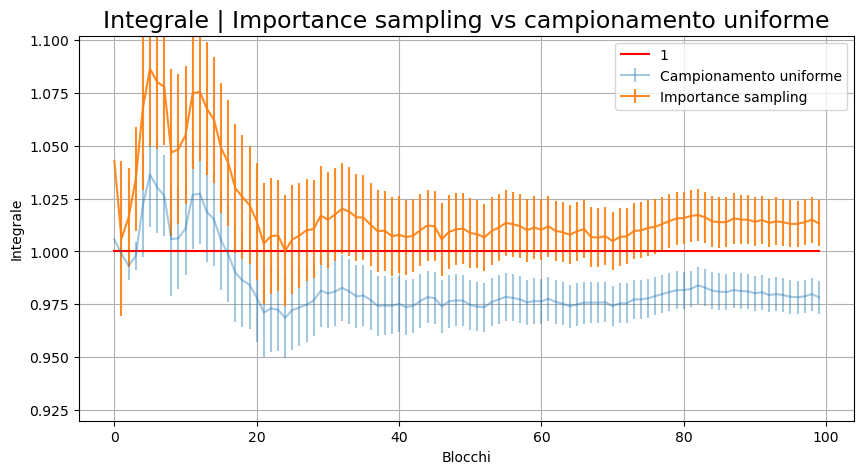

l'errore stimato sulla misura è \sigma=0.0109
lo scostamento dal risultato è 0.0133


In [67]:

sum_prog, err_prog = np.loadtxt("risultati/importanceSampling.txt", unpack=True)
sum_progUn, err_progUn = np.loadtxt("risultati/campionamentoUniforme.txt", unpack=True)

N=sum_prog.shape[0]
x=np.arange(N)

plt.figure(figsize=(10,5))
plt.errorbar(x,sum_progUn,yerr=err_progUn,alpha=0.4, label="Campionamento uniforme")
plt.errorbar(x,sum_prog,yerr=err_prog,alpha=0.9, label="Importance sampling")
plt.title("Integrale | Importance sampling vs campionamento uniforme", fontsize=17)
plt.xlabel('Blocchi')
plt.ylabel('Integrale')
plt.plot(x, pi_array, label='1', color="red")
plt.ylim([0.92,1.102])
plt.legend()
plt.grid(True)
plt.show()
print ("l'errore stimato sulla misura è \sigma={:.4f}".format(err_prog[-1]))
print("lo scostamento dal risultato è {:.4f}".format(sum_prog[-1]-1))

L'errore stimato sulla misura è 
$$\sigma=0.01$$
Lo scostamento dal risultato è $$\langle r\rangle -1=0.0216$$ che si discosta dal risultato di circa $3\sigma$. Pertanto, la stima non è molto accurata.

Dall'analisi del grafico è evidente che l'importance sampling conduce a una convergenza più rapida e a una riduzione delle incertezze. Questo avviene perché l'integrazione viene campionata in regioni dove l'integranda mostra comportamenti più interessanti per il calcolo dell'integrale.

# Cammino casuale su un reticolo


Text(0.5, 0, 'Z')

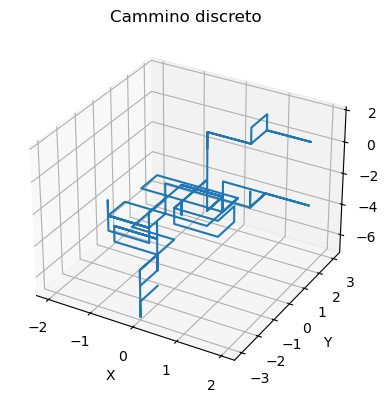

In [32]:
from mpl_toolkits.mplot3d import Axes3D

num_steps = 100
fig = plt.figure(figsize=(10, 6))
X,Y,Z = np.loadtxt("risultati/camminoDiscretoPos.txt", unpack=True)

ax = fig.add_subplot(121, projection='3d')
ax.plot(X,Y,Z)
ax.set_title('Cammino discreto')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')



fit with k*sqrt(x): k = [1.00089333] +- [[0.00027203]]


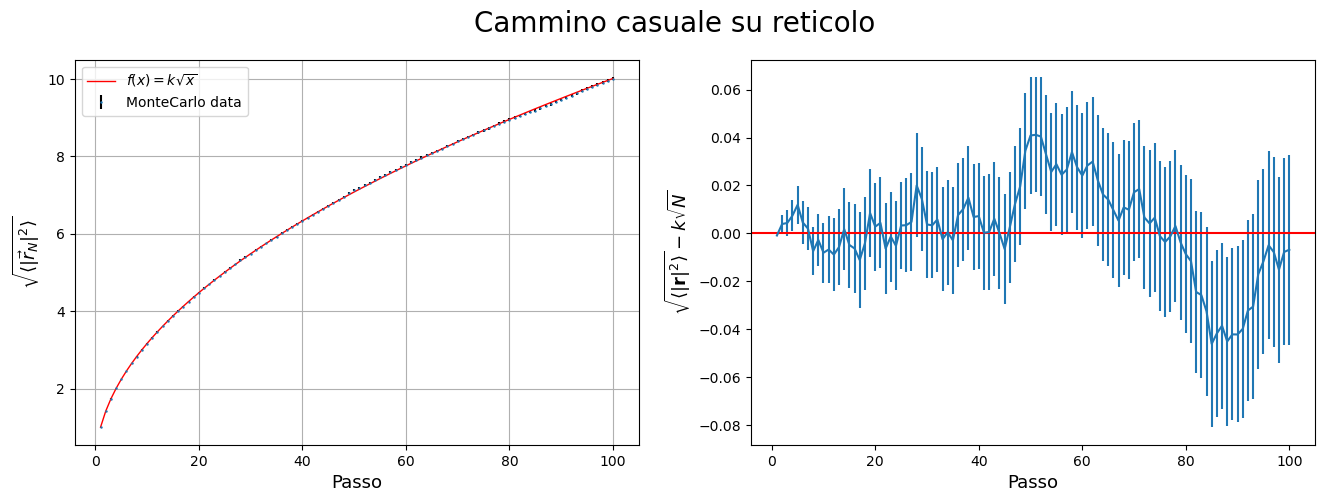

In [36]:
from scipy.optimize import curve_fit

def f (x, k):
    return k * np.sqrt(x)

yD, errD=np.loadtxt("risultati/camminoDiscreto.txt", unpack=True)

N=yD.shape[0]
x=np.arange(1,N+1)

#discrete fit
p_opt_disc, p_cov_disc = curve_fit(f, x, yD)
y_fit = f(x,p_opt_disc[0])


plt.figure(figsize=(16,5))
plt.suptitle("Cammino casuale su reticolo",fontsize=20)

plt.subplot(1,2,1)
plt.errorbar(x,yD,errD,fmt='.',label='MonteCarlo data', markersize=1.5, ecolor="black")
y_fitD = f(x,p_opt_disc)
plt.plot(x,y_fitD,'r',linewidth=1,label='$f(x)=k\sqrt{x}$')

plt.grid(True)
plt.xlabel('Passo',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.legend()

#Differences
plt.subplot(1,2,2)
plt.errorbar(x, yD-f(x,*p_opt_disc), yerr = errD)

plt.xlabel('Passo', fontsize = 13)
plt.ylabel(r'$\sqrt{\langle |\mathbf{r}|^2 \rangle}-k\sqrt{N}$', fontsize = 13)
plt.axhline(y=0, color = 'r', linestyle = '-', linewidth = 1.5)


print('fit with k*sqrt(x): k =',p_opt_disc,'+-',np.sqrt(p_cov_disc))

# Cammino casuale in uno spazio continuo

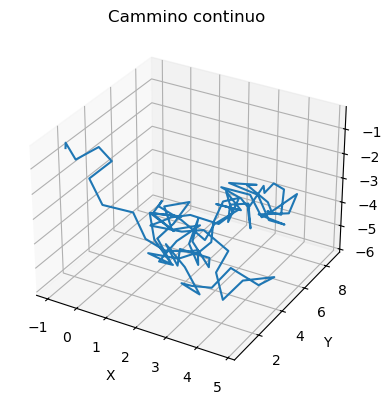

In [34]:

num_steps = 100
fig = plt.figure(figsize=(10, 6))
X,Y,Z = np.loadtxt("risultati/camminoContinuoPos.txt", unpack=True)

ax = fig.add_subplot(122, projection='3d')
ax.plot(X,Y,Z)
ax.set_title('Cammino continuo')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
plt.show()

fit with k*sqrt(x): k = [0.99978416]+-[[0.00027145]]


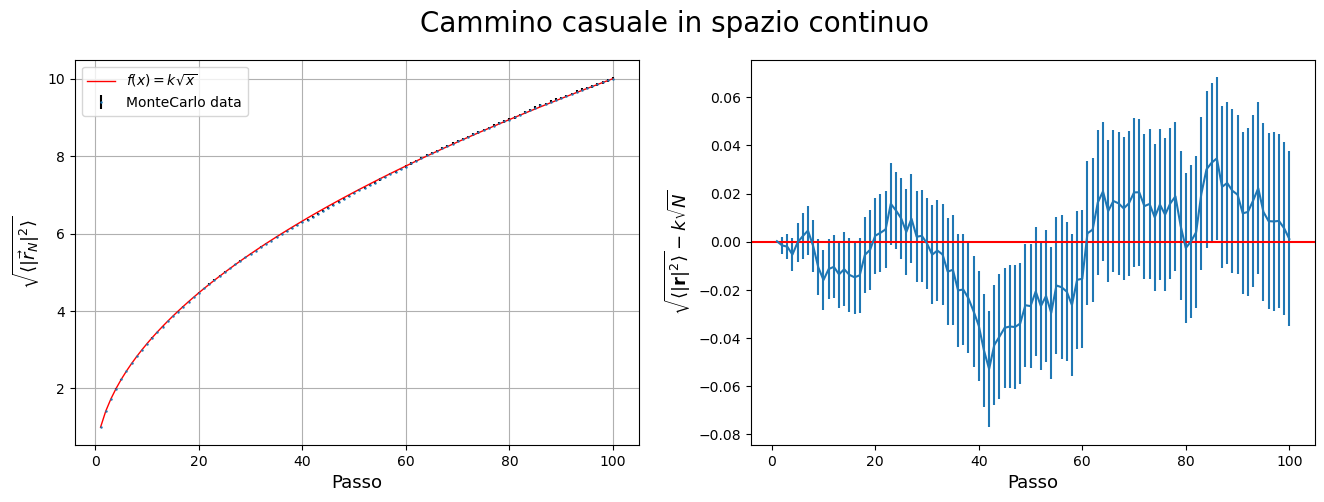

In [37]:
from scipy.optimize import curve_fit

def f (x, k):
    return k * np.sqrt(x)

yC, errC=np.loadtxt("risultati/camminoContinuo.txt", unpack=True)

N=yC.shape[0]
x=np.arange(1,N+1)

#continuous fit
p_opt_cont, p_cov_cont = curve_fit(f, x, yC)


plt.figure(figsize=(16,5))
plt.suptitle("Cammino casuale in spazio continuo",fontsize=20)


plt.subplot(1,2,1)
plt.errorbar(x,yC,errC,fmt='.',label='MonteCarlo data', markersize=1.5, ecolor="black")
y_fitC = f(x,p_opt_cont)
plt.plot(x,y_fitC,'r',linewidth=1,label='$f(x)=k\sqrt{x}$')

plt.grid(True)
plt.xlabel('Passo',fontsize=13)
plt.ylabel(r'$\sqrt{\langle|\vec{r}_{N}|^2\rangle}$',fontsize=13)
plt.legend()

#Differences
plt.subplot(1,2,2)
plt.errorbar(x, yC-f(x,*p_opt_cont), yerr = errC)

plt.xlabel('Passo', fontsize = 13)
plt.ylabel(r'$\sqrt{\langle |\mathbf{r}|^2 \rangle}-k\sqrt{N}$', fontsize = 13)
plt.axhline(y=0, color = 'r', linestyle = '-', linewidth = 1.5)

print('fit with k*sqrt(x): k = '+str(p_opt_cont)\
     +'+-'+str(np.sqrt(p_cov_cont)) )